# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

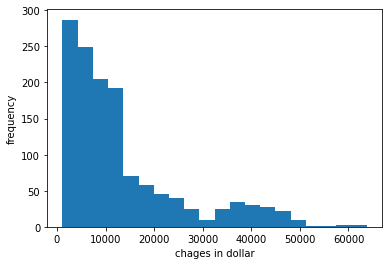

In [4]:
plt.hist(medical.charges,bins = 20)
plt.xlabel('chages in dollar')
plt.ylabel('frequency');

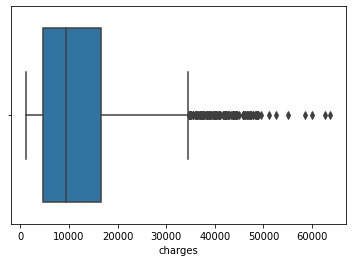

In [5]:
import seaborn as sns
sns.boxplot(x=medical.charges);


In [6]:
n = medical.shape[0]
mu = np.mean(medical.charges)
sd = np.std(medical.charges)
print(mu,sd)

13270.422265141257 12105.484975561605


The distribution is skewed to the right, most claims are below $\$1000$ but some charges go up to $\$6000$, with the average charge = $13270.42 and standard deviation = 12105.48

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ To be able to use inferential staistics there needs to be 3 rules that apply:
                     1. we assume that the population we collected the sample from is normally distributed
                     2. We assume that the sample is a simple random sample
                     3. The sample values is independent, meaning sampling with replacement
                     
This is a one sample t test where we measure t 

\begin{equation}
t= \frac{(x - mu)}{\frac{s}{\sqrt{n}}}
\end{equation}
where x=12000 and mu=the mean average charge of sample

H0: there is no difference between the mean charge and 12000==> mean charge = 12000
H1: there is a difference, mean charge < 12000
This is a lower one tailed test where the critical value is 0.05

calculate the p_value for a mean of at least 12000, to see if it is lower than the critical value. 



__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

This is a one sided test, or spicifically a left sided test testing if the average charge is below 12000

In [33]:
diff = 12000 - mu 
se = sd/np.sqrt(n)
se,diff
t = diff / se
t

-3.838786511901477

In [25]:
#95% confidence interval, with a singnificance level of 5%, first calculate the critical value
c_value = t.ppf(0.05,n-1)
c_value

-1.6459941145571324

In [94]:
#p_value for t 
p_value = t.cdf(-3.84,df=n-1)
p_value

6.439533174508859e-05

In [148]:
stats.ttest_1samp(medical.charges,12000)

Ttest_1sampResult(statistic=3.8373517196585314, pvalue=0.000130171652092872)

---
## Conclusion

t=-3.84 and the critical value(c_value)=-1.28 which means that t < c_value. Also the p_value for t is 0.000064   which is smaller than 0.05. So we can reject the null hypothesis that average hospital charge is equal to 12000 and we can conclude that the hospital is charging less than 12000 on average.

---
 


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__   
To be able to perform a two sample t test we assume that the variances of the two groups, insured and not insured are equal

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

This is a two sample t_test
* H0: mean charge for insured - mean charge for un_insured = 0  
* H1: mean charge for insured - mean charge for un_insured $\neq$ 0   
This is a two sided test
so what we need to study is the mean difference of the sampling distribution

In [94]:
medical.insuranceclaim.value_counts(normalize = True)

1    0.585202
0    0.414798
Name: insuranceclaim, dtype: float64

In [35]:
insured = medical[medical.insuranceclaim==1]
insured.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             783 non-null    int64  
 1   sex             783 non-null    int64  
 2   bmi             783 non-null    float64
 3   children        783 non-null    int64  
 4   smoker          783 non-null    int64  
 5   region          783 non-null    int64  
 6   charges         783 non-null    float64
 7   insuranceclaim  783 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.1 KB


In [36]:
non_insured = medical[medical.insuranceclaim==0]
non_insured.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555 entries, 2 to 1336
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             555 non-null    int64  
 1   sex             555 non-null    int64  
 2   bmi             555 non-null    float64
 3   children        555 non-null    int64  
 4   smoker          555 non-null    int64  
 5   region          555 non-null    int64  
 6   charges         555 non-null    float64
 7   insuranceclaim  555 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 39.0 KB


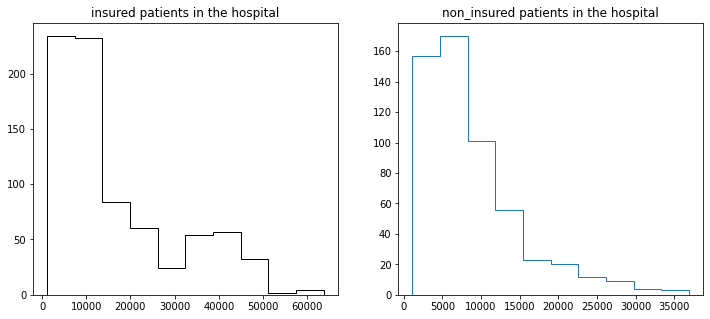

In [39]:
#plotting
fig,ax = plt.subplots(1,2,figsize=(12,5))
ax[0].hist(insured.charges,bins=10,histtype = 'step',color='k');
ax[0].set_title('insured patients in the hospital')
ax[1].hist(non_insured.charges, bins=10,histtype = 'step')
ax[1].set_title('non_insured patients in the hospital');

Central limit theorem applies to independent variables
Both data sets are not normal, both are right skewed with a long tail. To be able to 

In [71]:
#mean and standard deviation of insured 
mu_insured = insured.charges.mean()
sd_insured = insured.charges.std(ddof=1)
n0 = insured.shape[0]
print(('mu = {0:.2f}, std = {1:.2f},n ={2} ').format(mu_insured, sd_insured,n0))

mu = 16423.93, std = 14045.93,n =783 


In [72]:
#mean and standard deviation of non_insured 
mu_noninsured = np.mean(non_insured.charges)
sd_noninsured = np.std(non_insured.charges)
n1 = non_insured.shape[0]
print(('mu = {0:.2f}, std = {1:.2f}, n= {2}').format(mu_noninsured, sd_noninsured,n1))

mu = 8821.42, std = 6440.70, n= 555


In [76]:
#calculate manually
#combined standard error sp
sp = np.sqrt(((n0-1)*(sd_insured**2) + (n1-1)*(sd_noninsured**2))/(n0+n1-2))
sp


11518.686543727163

In [126]:
#calculate the t statistic for the mean difference
t = (mu_insured - mu_noninsured)/(sp *  np.sqrt((1/n0)+(1/n1)))
t

11.894690586845138

In [133]:
#the p_value for t statistic t
df = n0 + n1 -2
p_v = t.sf(abs(11.89469), df)
p_v

2.1972644438737044e-31

In [134]:
#calculate the critical value
df = n0 + n1 -2
c_value = t.ppf(0.975,df)
#so 95% confidence interval is -1.96 to 1.96
c_value
c_value * sp

22596.682182200242

In [139]:
from  scipy import stats
stats.ttest_ind(insured.charges,non_insured.charges, equal_var=True)


Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)

In [137]:
stats.ttest_rel(insured.charges,non_insured.charges)

ValueError: unequal length arrays

t is smaller than the critical value and it has a probability of 4 x 10<sup>-31</sup> which is very small. We can reject the null hypothesis that the hospital is charging insured and uninsured patients the same, and conclude that the hospital is indeed charging the two groups differentlt

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test